In [36]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics

Introduction
   1) In this algorithm a flie containing handwritten charcters is imported
        The process is to preprocess the data in this file using "Principle Componets Analysis (PCA) and 
        is have it in a suitable form to apply KMeans, ie. the clustering function
        It considers the relationship of variables using varience and outputs a metric called Explained variance 
   2) The clustering model(KMeans) output is compared against know data to calculate accuracy
   3) There are metrics used such as distance between cluster, inertia and its gradient to help monitor success of the process
    

In [37]:
#Import the images of handwritting examples
digits = load_digits()
X = digits.data
#The following is used to compare our results
ground_truth = digits.target

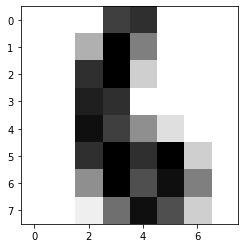

In [50]:
#What are we looking at? so we are inporting images like the following
plt.imshow(digits.images[6],cmap='binary',interpolation='none')
#So this is a representation of a 6

In [39]:
#Here we are doing preprocessing using "Principle Componets Analysis (PCA)
#The major consideration in the outcome is explained varience
pca = PCA(n_components=40)
Cx = pca.fit_transform(scale(X))
print('Explained variance %0.3f' % sum(pca.explained_variance_ratio_))

Explained variance 0.951


In [40]:
#Here we are using KMeans to do clustering
clustering = KMeans(n_clusters=10, n_init=10, random_state=1)
#Then fitting the model
clustering.fit(Cx)

KMeans(n_clusters=10, random_state=1)

In [41]:
#We are comparing the model with the correct image
ms = np.column_stack((ground_truth,clustering.labels_))
df = pd.DataFrame(ms, columns = ['Ground truth','Clusters'])
pd.crosstab(df['Ground truth'], df['Clusters'], margins=True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Ground truth,,,,,,,,,,,
0,0,0,0,0,176,0,0,2,0,0,178
1,0,27,108,0,0,1,0,46,0,0,182
2,0,141,25,0,1,6,1,3,0,0,177
3,0,1,7,8,0,160,7,0,0,0,183
4,0,0,0,1,0,0,11,160,5,4,181
5,3,0,1,136,0,40,0,2,0,0,182
6,174,0,6,0,1,0,0,0,0,0,181
7,0,0,1,3,0,0,155,1,19,0,179
8,2,1,105,6,1,52,4,3,0,0,174


In [42]:
# How good is the results?
metrics.adjusted_rand_score(ground_truth,clustering.labels_)

0.5461792584049107

In [43]:
#Cluster distance
dist = clustering.fit_transform(Cx)
print (np.min(dist,axis=0))
print (np.argmin(dist,axis=0))

[ 2.32056521  3.81332568  2.64903648  3.41931857  2.16158729  3.25056728
  2.9755445   3.54807404  3.65499578 12.30316712]
[ 272  388 1327 1075  682 1740  624   97  467 1043]


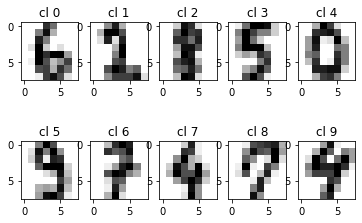

In [44]:
#Plotting the output
for k,img in enumerate(np.argmin(dist,axis=0)):
    cluster = clustering.labels_[img]
    plt.subplot(2, 5, cluster+1)
    plt.imshow(digits.images[img],cmap='binary',interpolation='none')
    plt.title('cl '+str(cluster))
plt.show()

The images in order of line, left to right are 6,1,1,5,0,9,european 7, 4, 7 and 4 

In [45]:
#Inertia is a gradient measure showing rate of change
inertia = list()
delta_inertia = list()
for k in range(1,21):
    clustering = KMeans(n_clusters=k, n_init=10, random_state=1)
    clustering.fit(Cx)
    if inertia:
        delta_inertia.append(inertia[-1] - clustering.inertia_)
    inertia.append(clustering.inertia_)

In [46]:
print(inertia)

[104219.18399416763, 95036.8353635123, 88443.48189549301, 84033.51569210894, 80035.63591640734, 76363.06900061393, 72733.1152145778, 69921.02268365781, 66839.57284232577, 64668.945642071805, 62961.88210838039, 60690.69758088281, 57649.018203525025, 56504.71119750459, 55054.003381763636, 53839.750208713245, 52893.14391708481, 50432.568567307375, 49652.73313032993, 49096.147837820834]


In [47]:
len([k for k in range(1,21)])

20

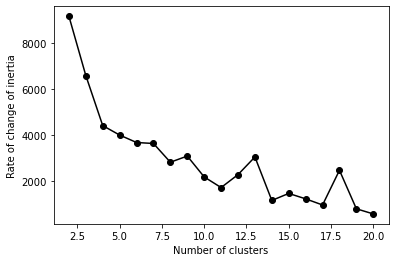

In [48]:
#Now showing rate of change in plot
plt.figure()
plt.plot([k for k in range(2,21)], delta_inertia, 'ko-')
plt.xlabel('Number of clusters')
plt.ylabel('Rate of change of inertia')
plt.show()